In [115]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [70]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 550.5 kB/s eta 0:00:24
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:10
     ----- ---------------------------------- 1.9/12.8 MB 10.1 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 16.8 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 20.8 MB/s eta 0:00:01
     ------------------------- -------------- 8.3/12.8 MB 24.1 MB/s eta 0:00:01
     ------------------------------- ------- 10.2/12.8 MB 27.2 MB/s eta 0:00:01
     ----------------------------------- --- 11.6/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 43.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB

In [16]:
#Load spacy English Language model
NER = spacy.load("en_core_web_sm")
NER.max_length = 1500000  # Increase the maximum length

In [71]:
def clean_data(df):
    # Rename column 'Character Name' to 'full_name'
    df = df.rename(columns={'Character Name': 'full_name'})
    # Split 'full_name' into multiple columns
    df_split = df['full_name'].str.split(expand=True).add_prefix('name_part_')
    # Rename the first column of df_split to 'first_name'
    df_split = df_split.rename(columns={'name_part_0': 'first_name'})
    # Concatenate df and df_split along the columns axis
    df = pd.concat([df, df_split], axis=1)
    # Reorder the columns to have 'full_name' after 'Book' and before 'first_name'
    df = df[['Book', 'full_name', 'first_name'] + [col for col in df.columns if col not in ['Book', 'full_name', 'first_name']]]
    # Drop the unnecessary columns
    df = df.drop(columns=['name_part_1', 'name_part_2', 'name_part_3'])
    # Change 'first_name' from 'Samwise' to 'Sam' for 'full_name' 'Samwise Gamgee'
    df.loc[df['full_name'] == 'Samwise Gamgee', 'first_name'] = 'Sam'
    return df

# Load the data from the CSV file
df = pd.read_csv(r'd:\\Software_Projects\\lotr_network\\data\\characters.csv')

character_df = clean_data(df)
character_df

,Book,full_name,first_name
0,The Fellowship of the Ring,Frodo Baggins,Frodo
1,The Fellowship of the Ring,Samwise Gamgee,Sam
2,The Fellowship of the Ring,Meriadoc Brandybuck,Meriadoc
3,The Fellowship of the Ring,Peregrin Took,Peregrin
4,The Fellowship of the Ring,Aragorn (Strider),Aragorn
5,The Fellowship of the Ring,Gandalf the Grey,Gandalf
6,The Fellowship of the Ring,Legolas Greenleaf,Legolas
7,The Fellowship of the Ring,Gimli son of Gloin,Gimli
8,The Fellowship of the Ring,Boromir,Boromir
9,The Two Towers,Gollum (Sméagol),Gollum


In [18]:
import os

# Get a list of all .txt files in the data folder
all_books = [b for b in os.scandir('data') if b.is_file() and '.txt' in b.name]

In [19]:
all_books

[<DirEntry 'the_fellowship_of_the_ring.txt'>,
 <DirEntry 'the_return_of_king.txt'>,
 <DirEntry 'the_two_towers.txt'>]

In [20]:
first_book = all_books[0]
book_text = open(first_book).read()
book_doc = NER(book_text)

In [22]:
displacy.render(book_doc[10000:12000], style="ent", jupyter=True)

In [84]:
sentence_entity_df = []
for sentence in book_doc.sents:
    entity_list = [ent.text for ent in sentence.ents]
    sentence_entity_df.append({"sentence": sentence, "entities": entity_list})
    
sentence_entity_df = pd.DataFrame(sentence_entity_df)

In [85]:
sentence_entity_df

,sentence,entities
0,"(*, PROLOGUE, *, \n\n\n\n, 1, .)",[1]
1,"(Concerning, Hobbits, \n\n\n\n, This, book, is...",[Hobbits]
2,"(Further, information, will, also, be, found, ...","[the Red Book of \nWestmarch, The Hobbit]"
3,"(That, story, was, derived, from, the, earlier...","[the Red Book, Bilbo, Hobbit, East]"
4,"(Many, ,, however, ,, may, wish, to, know, mor...",[]
...,...,...
13017,"(There, they, found, a, shelving, shore, ,, an...",[]
13018,"(Then, shouldering, their, burdens, ,, they, s...","[the Emyn Muil, Shadow]"
13019,"(Here, ends, the, first, part, of, the, histor...","[first, the War of the Ring]"
13020,"(The, second, part, is, called, THE, TWO, TOWE...","[second, TWO, ORTHANC, Saruman, Mordor, the Gr..."


In [86]:
def filter_entity(entity_list, character_df):
    return [ent for ent in entity_list 
            if ent in character_df['first_name'].values
            or ent in character_df['full_name'].values
            ]

In [87]:
sentence_entity_df['character_entities'] = sentence_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entitites
sentence_entity_df_filtered = sentence_entity_df[sentence_entity_df['character_entities'].map(len) > 0]
sentence_entity_df_filtered

,sentence,entities,character_entities
3,"(That, story, was, derived, from, the, earlier...","[the Red Book, Bilbo, Hobbit, East]",[Bilbo]
30,"(But, in, the, days, of, Bilbo, ,, and, of, Fr...","[the days, Bilbo]",[Bilbo]
32,"(Of, their, original, home, the, \n, Hobbits, ...",[Bilbo],[Bilbo]
53,"(Even, \n, in, Bilbo, 's, time, the, strong, F...",[Bilbo],[Bilbo]
57,"(Most, of, their, earlier, settlements, had, l...","[Bilbo, one, first, Bree, Chetwood, some forty...",[Bilbo]
...,...,...,...
13003,"(But, Iâ€, ™, m, glad, ,, Sam, .)",[Sam],[Sam]
13011,"(We, may, ,, ', said, Sam, ., \n\n)",[Sam],[Sam]
13012,"(So, Frodo, and, Sam, set, off, on, the, last,...","[Sam, Quest]",[Sam]
13015,"(Even, with, such, help, as, Sam, could, give,...",[Sam],[Sam]


In [99]:
sentence_entity_df_filtered['character_entities'] = sentence_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\Admin\AppData\Local\Temp\ipykernel_21764\3402271959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_entity_df_filtered['character_entities'] = sentence_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [101]:
pd.reset_option('^display.', silent=True)
sentence_entity_df_filtered

,sentence,entities,character_entities
3,"(That, story, was, derived, from, the, earlier...","[the Red Book, Bilbo, Hobbit, East]",[Bilbo]
30,"(But, in, the, days, of, Bilbo, ,, and, of, Fr...","[the days, Bilbo]",[Bilbo]
32,"(Of, their, original, home, the, \n, Hobbits, ...",[Bilbo],[Bilbo]
53,"(Even, \n, in, Bilbo, 's, time, the, strong, F...",[Bilbo],[Bilbo]
57,"(Most, of, their, earlier, settlements, had, l...","[Bilbo, one, first, Bree, Chetwood, some forty...",[Bilbo]
...,...,...,...
13003,"(But, Iâ€, ™, m, glad, ,, Sam, .)",[Sam],[Sam]
13011,"(We, may, ,, ', said, Sam, ., \n\n)",[Sam],[Sam]
13012,"(So, Frodo, and, Sam, set, off, on, the, last,...","[Sam, Quest]",[Sam]
13015,"(Even, with, such, help, as, Sam, could, give,...",[Sam],[Sam]


In [106]:
window_size = 5
relationships = []

for i in range(sentence_entity_df_filtered.index[-1]):
    end_i = min(i+5, sentence_entity_df_filtered.index[-1])
    char_list = sum((sentence_entity_df_filtered.loc[i:end_i, 'character_entities']), [])
    
    char_unique = [char_list[i] for i in range(len(char_list))
                if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [156]:
relationships_df = pd.DataFrame(relationships)
relationships_df.head(5)

,source,target
0,Bilbo,Frodo
1,Bilbo,Frodo
2,Bilbo,Frodo
3,Bilbo,Frodo
4,Bilbo,Frodo


In [109]:
pd.set_option('display.max_rows', None)
relationships_df.head()

,source,target
0,Bilbo,Frodo
1,Bilbo,Frodo
2,Bilbo,Frodo
3,Bilbo,Frodo
4,Bilbo,Frodo


In [157]:
# Sort the cases with a -> b and b -> a
relationship_df = pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)
relationship_df.head(5)

,source,target
0,Bilbo,Frodo
1,Bilbo,Frodo
2,Bilbo,Frodo
3,Bilbo,Frodo
4,Bilbo,Frodo


In [158]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(['source', 'target'], sort=False, as_index=False).sum()
relationship_df.head(5)

,source,target,value
0,Bilbo,Frodo,589
1,Bilbo,Gollum,167
2,Bilbo,Gandalf,242
3,Gandalf,Gollum,38
4,Frodo,Gandalf,493


## Graph Analysis & Visualization

In [116]:
# Create a graph from pandas DataFrame
G = nx.from_pandas_edgelist(relationship_df,
                            source='source',
                            target='target',
                            edge_attr='value',
                            create_using=nx.Graph())

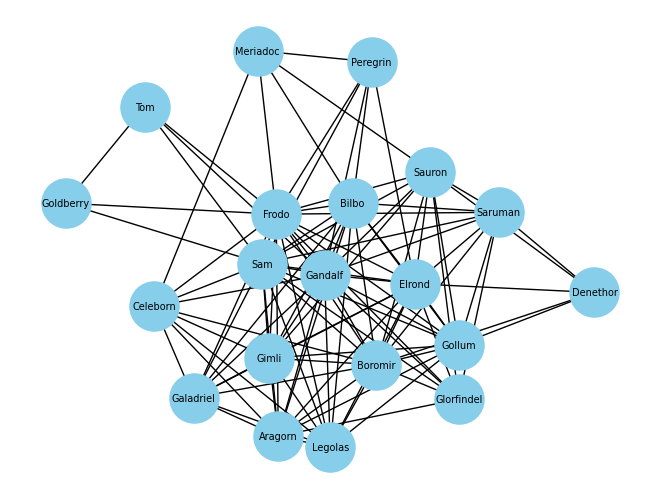

In [133]:
pos = nx.kamada_kawai_layout(G)
nx.draw(
    G, 
    with_labels=True, 
    node_color='skyblue', 
    node_size=1250, 
    edge_cmap=plt.cm.Blues, 
    edge_color='black', 
    linewidths=1, 
    font_size=7, 
    pos=pos
        )

plt.show()

In [139]:
from pyvis.network import Network
net = Network(
    notebook = True, 
    width='1000px',
    height='700px',
    bgcolor='#222222',
    font_color='white',
    cdn_resources='remote'
)

node_degree = dict(G.degree)

In [ ]:
net.from_nx(G)
net.show('lotr.html')

In [140]:
node_degree

{'Bilbo': 13,
 'Frodo': 18,
 'Gollum': 12,
 'Gandalf': 16,
 'Peregrin': 6,
 'Meriadoc': 5,
 'Sauron': 11,
 'Celeborn': 9,
 'Galadriel': 10,
 'Sam': 17,
 'Saruman': 10,
 'Tom': 4,
 'Goldberry': 3,
 'Elrond': 15,
 'Glorfindel': 8,
 'Aragorn': 12,
 'Gimli': 12,
 'Legolas': 11,
 'Boromir': 15,
 'Denethor': 5}

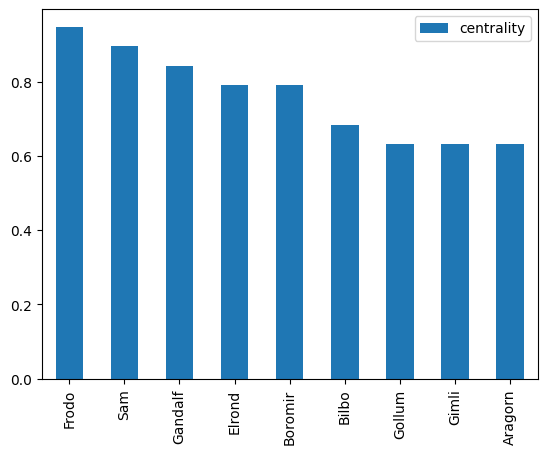

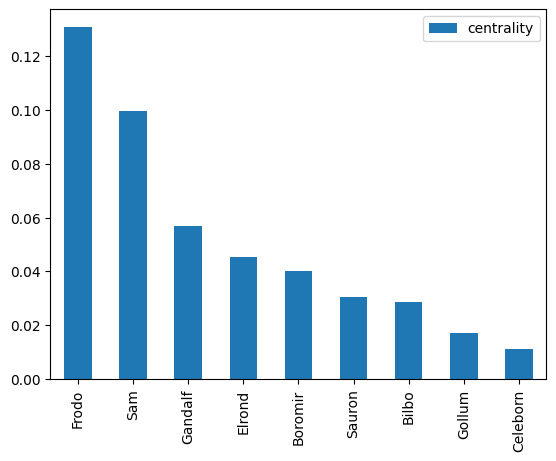

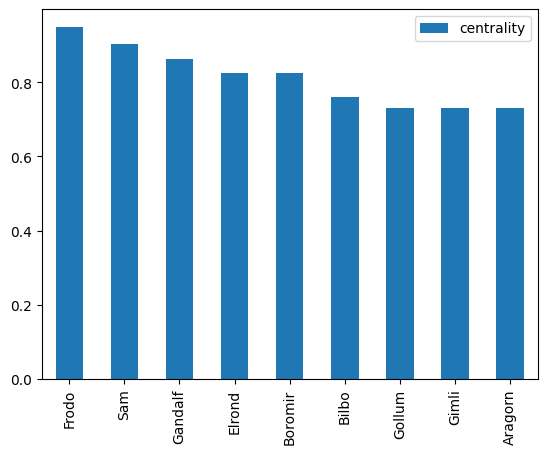

In [145]:
def compute_and_plot_centrality(G, centrality_func):
    # Compute centrality
    centrality_dict = centrality_func(G)
    
    # Convert to DataFrame
    centrality_df = pd.DataFrame.from_dict(centrality_dict, orient='index', columns=['centrality'])
    
    # Plot top 10 nodes
    centrality_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")
    plt.show()

# Now you can call this function with different centrality functions
compute_and_plot_centrality(G, nx.degree_centrality)
compute_and_plot_centrality(G, nx.betweenness_centrality)
compute_and_plot_centrality(G, nx.closeness_centrality)

In [146]:
# Save centrality measures
nx.set_node_attributes(G, nx.degree_centrality(G), 'degree_centrality')
nx.set_node_attributes(G, nx.betweenness_centrality(G), 'betweenness_centrality')
nx.set_node_attributes(G, nx.closeness_centrality(G), 'closeness_centrality')

In [160]:
import community as community_louvain
communities = community_louvain.best_partition(G)

In [163]:
communities = community_louvain.best_partition(G)
print(communities)

{'Bilbo': 0, 'Frodo': 0, 'Gollum': 2, 'Gandalf': 1, 'Peregrin': 0, 'Meriadoc': 0, 'Sauron': 2, 'Celeborn': 1, 'Galadriel': 1, 'Sam': 0, 'Saruman': 2, 'Tom': 0, 'Goldberry': 0, 'Elrond': 2, 'Glorfindel': 2, 'Aragorn': 1, 'Gimli': 1, 'Legolas': 1, 'Boromir': 2, 'Denethor': 2}


In [161]:
nx.set_node_attributes(G, communities, 'group')

In [164]:
for node in G.nodes(data=True):
    print(node)

('Bilbo', {'size': 10, 'degree_centrality': 0.6842105263157894, 'betweenness_centrality': 0.028580711036851385, 'closeness_centrality': 0.76, 'group': 0})
('Frodo', {'size': 10, 'degree_centrality': 0.9473684210526315, 'betweenness_centrality': 0.13083402951824005, 'closeness_centrality': 0.95, 'group': 0})
('Gollum', {'size': 10, 'degree_centrality': 0.631578947368421, 'betweenness_centrality': 0.017184164113988674, 'closeness_centrality': 0.7307692307692307, 'group': 2})
('Gandalf', {'size': 10, 'degree_centrality': 0.8421052631578947, 'betweenness_centrality': 0.056857421331105544, 'closeness_centrality': 0.8636363636363636, 'group': 1})
('Peregrin', {'size': 10, 'degree_centrality': 0.3157894736842105, 'betweenness_centrality': 0.003801169590643275, 'closeness_centrality': 0.59375, 'group': 0})
('Meriadoc', {'size': 10, 'degree_centrality': 0.2631578947368421, 'betweenness_centrality': 0.004905782975958414, 'closeness_centrality': 0.5757575757575758, 'group': 0})
('Sauron', {'size'

In [167]:
# Create a color map based on the communities
color_map = {node: communities[node] for node in G.nodes()}

# Add the color map to the network
com_net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white', cdn_resources='remote')
com_net.from_nx(G)
com_net.show_buttons(filter_=['physics'])
for node in com_net.nodes:
    node['color'] = color_map[node['id']]

# Show the network
com_net.show('lotr_com.html')

lotr_com.html
